# KMeans Clustering Analysis

Import necessary libraries and dataset

In [2]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('customer_df.csv')
df.head(5)

,birth_year,annual_income,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue,marital_status_married,marital_status_single,marital_status_widowed,age,age_group
0,1965.0,75579400.0,0.0,58.0,825500.0,114400.0,709800.0,223600.0,114400.0,114400.0,8.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,11.0,0.0,1.0,0.0,59.0,50s
1,1962.0,60247200.0,2.0,38.0,14300.0,1300.0,7800.0,2600.0,1300.0,7800.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,1.0,0.0,62.0,60+
2,1973.0,93096900.0,0.0,26.0,553800.0,63700.0,165100.0,144300.0,27300.0,54600.0,8.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,1.0,0.0,0.0,51.0,50s
3,1992.0,34639800.0,1.0,26.0,14300.0,5200.0,26000.0,13000.0,3900.0,6500.0,2.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,1.0,0.0,0.0,32.0,30s
4,1989.0,75780900.0,1.0,94.0,224900.0,55900.0,153400.0,59800.0,35100.0,19500.0,5.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,1.0,0.0,0.0,35.0,30s


### Preparing Dataset

I dividied the annua_income column by a million and divided all 'amount' columns by 1000 for easier representation.\
I then dropped birth_year, revenue, annual_income, and age_group columns because they are no longer needed.

In [4]:
# create annual_income_million column for easier interpretation
df['annual_income_million'] = df['annual_income'] / 1000000

# divide amount spent columns by 1000 for easier interpretation
amount_col = []
for col in df.columns:
    if 'amount' in col:
        amount_col.append(col)
        df[col] = df[col] / 1000

# drop unnecessary columns
df.drop(['birth_year', 'revenue','annual_income','age_group'], axis=1, inplace=True)

df.head(5)

,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,marital_status_married,marital_status_single,marital_status_widowed,age,annual_income_million
0,0.0,58.0,825.5,114.4,709.8,223.6,114.4,114.4,8.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,59.0,75.5794
1,2.0,38.0,14.3,1.3,7.8,2.6,1.3,7.8,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,62.0,60.2472
2,0.0,26.0,553.8,63.7,165.1,144.3,27.3,54.6,8.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,51.0,93.0969
3,1.0,26.0,14.3,5.2,26.0,13.0,3.9,6.5,2.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,32.0,34.6398
4,1.0,94.0,224.9,55.9,153.4,59.8,35.1,19.5,5.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,35.0,75.7809


### KMeans Clustering

To determine the appropriate number of clusters, I used the "elbow plot" method.

In [5]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

Text(0.5, 1.0, 'Elbow Plot to Determine Number of Clusters')

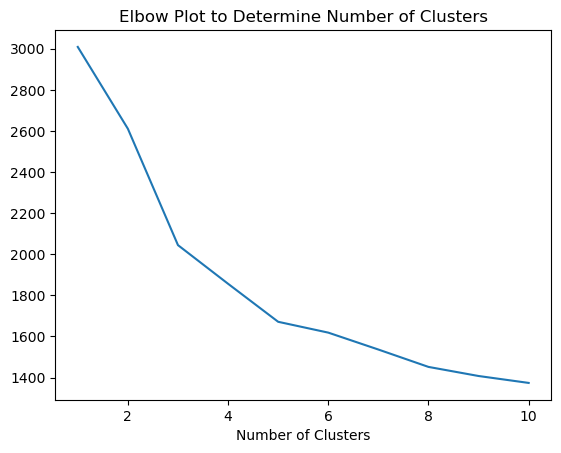

In [7]:
n = 10
inertia = []

for k in range(1, n+1):
    clusters = KMeans(n_clusters = k, n_init='auto', init='k-means++', random_state = 21).fit(df_scaled)
    inertia.append(clusters.inertia_)
    
sns.lineplot(x=range(1, n+1), y=inertia)
plt.xlabel('Number of Clusters')
plt.title('Elbow Plot to Determine Number of Clusters')

I determined that the 'elbow' at five (5) clusters was a significant drop. Therefore, I proceeded with segmenting customers into five clusters.

In [8]:
# adding cluster label
final_clusters = KMeans(n_clusters = 5, n_init='auto', init='k-means++', random_state=21).fit(df_scaled)
df['cluster'] = final_clusters.labels_
df.head(5)

,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,marital_status_married,marital_status_single,marital_status_widowed,age,annual_income_million,cluster
0,0.0,58.0,825.5,114.4,709.8,223.6,114.4,114.4,8.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,59.0,75.5794,2
1,2.0,38.0,14.3,1.3,7.8,2.6,1.3,7.8,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,62.0,60.2472,2
2,0.0,26.0,553.8,63.7,165.1,144.3,27.3,54.6,8.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,51.0,93.0969,3
3,1.0,26.0,14.3,5.2,26.0,13.0,3.9,6.5,2.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,32.0,34.6398,1
4,1.0,94.0,224.9,55.9,153.4,59.8,35.1,19.5,5.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,35.0,75.7809,1


In [9]:
# create total_amount column by summing up all amount columns
df['total_amount'] = df[amount_col].sum(axis=1)

Then, I grouped the dataset by cluster ids and compared the averages to see how each group was different.

In [109]:
df_cluster = df.groupby('cluster').mean()
df_cluster

,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,marital_status_married,marital_status_single,marital_status_widowed,age,annual_income_million,total_amount
cluster,,,,,,,,,,,,,,,,,,,,,,,
0,0.217391,45.130435,1140.646377,71.584783,588.042754,105.384783,79.149275,103.293478,5.550725,8.028986,1.195652,0.615942,0.152174,0.173913,0.471014,0.855072,0.811594,0.637681,0.202899,0.050725,45.644928,105.344873,2088.101449
1,1.277913,49.377427,115.927184,7.599636,49.168083,11.474393,7.523908,28.628398,2.875000,3.716019,2.516990,0.004854,0.002427,0.065534,0.027913,0.000000,0.075243,1.000000,0.000000,0.000000,45.459951,48.944749,220.321602
2,0.925764,49.871179,330.370306,32.778166,207.892140,46.734716,32.221834,56.070306,3.805677,5.447598,2.235808,0.030568,0.004367,0.078603,0.048035,0.013100,0.176856,0.000000,1.000000,0.000000,44.681223,63.368567,706.067467
3,0.613767,49.099426,702.323136,67.831166,399.184512,95.834608,70.127916,90.739006,5.778203,8.824092,2.281071,0.066922,0.009560,0.057361,0.074570,0.066922,0.063098,1.000000,0.000000,0.000000,49.814532,88.832832,1426.040344
4,1.028070,49.115789,393.626316,34.096491,186.789474,47.475088,35.592632,59.029123,4.336842,5.870175,2.498246,0.021053,0.000000,0.066667,0.063158,0.010526,0.161404,0.000000,0.000000,0.245614,51.554386,67.081802,756.609123


Some quick observations I made using the table are:\
1) Cluster 0 has the highest annual income at about 105 million KRW. On the other hand, Cluster 1 had the lowest annual income at 48 million KRW.
2) Not too surprising that the highest earning cluster (Cluster 0) had the highest total amount spent at around 2,088,000 KRW, while the lowest earning cluster (Cluster 1) had the lowest total amount spent.
3) Customers in Clusters 1 and 3 were all married, those in Cluster 2 were all single.
4) Cluster 4 was the oldest cluster, while Cluster 2 was the youngest.
5) Cluster 0 was the most receptive to all promotions among all clusters.